In [74]:
import torch
from transformers import BertForQuestionAnswering
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re
import warnings
warnings.filterwarnings('ignore')
from summarizer import Summarizer,TransformerSummarizer

In [73]:
# !pip install bert-extractive-summarizer

In [2]:
summ_df=pd.read_csv("summ_df.csv",index_col=0)

In [3]:
summ_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titles     1004 non-null   object
 1   abstracts  924 non-null    object
 2   sections   946 non-null    object
 3   summaries  1009 non-null   object
 4   citations  1009 non-null   object
dtypes: object(5)
memory usage: 47.3+ KB


In [4]:
summ_df['text'] = summ_df['citations'].map(str) + ' ' + summ_df['abstracts'].map(str)

## BERT

In [75]:
body=summ_df["text"][0]

In [81]:
body

"The sentences in the DSO collection were tagged with parts of speech using TnT (Brants, 2000) trained on the Brown Corpus itself.  The English POS-tagging has been carried out using freely available TNT tagger (Brants, 2000). This proposition is quite viable as statistical POS taggers like TnT (Brants, 2000) are available. We use TnT (Brants, 2000), a second order Markov Model tagger. For PoS tagging and lemmatization, we combine GENIA (with its built-in, occasionally deviant to kenizer) and TnT (Brants, 2000), which operates on pre-tokenized inputs but in its default models trained on financial news from the Penn Tree bank. Tag the tokens with PTB-style POS tags using a tagger (Brants, 2000). For example, Petrov et al (2012) build supervised POS taggers for 22 languages using the TNT tagger (Brants, 2000), with an average accuracy of 95.2%. Forun aligned words, we simply assign a random POS and very low probability, which does not substantially affect transition probability estimates

In [79]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(body, min_length=20))
print(bert_summary)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The sentences in the DSO collection were tagged with parts of speech using TnT (Brants, 2000) trained on the Brown Corpus itself. For PoS tagging and lemmatization, we combine GENIA (with its built-in, occasionally deviant to kenizer) and TnT (Brants, 2000), which operates on pre-tokenized inputs but in its default models trained on financial news from the Penn Tree bank. Tag the tokens with PTB-style POS tags using a tagger (Brants, 2000). based on tree-structures of various complexity in the tree-adjoining grammar model. POS tags, on the other, represent more of a challenge with only 91.6% NORM LEMMA POS Agreed tokens (out of 57,845) 56,052 55,217 52,959 Accuracy (%) 96.9% 95.5% 91.6% Table 3: Inter-annotator agreement agreement between two annotators, which is cons id erably lower than the agreement level reported for annotating a corpus of modern German using STTS, at 98.6% (Brants, 2000a). Furthermore, we present evaluations on two corpora.


In [104]:
reference=[summ_df["summaries"][0].split(' ')]

In [105]:
bert_cand=bert_summary.split(' ')

In [106]:
reference

[['TnT',
  '-',
  'A',
  'Statistical',
  'Part-Of-Speech',
  "Tagger\nTrigrams'n'Tags",
  '(TnT)',
  'is',
  'an',
  'efficient',
  'statistical',
  'part-of-speech',
  'tagger.\nContrary',
  'to',
  'claims',
  'found',
  'elsewhere',
  'in',
  'the',
  'literature,',
  'we',
  'argue',
  'that',
  'a',
  'tagger',
  'based',
  'on',
  'Markov',
  'models',
  'performs',
  'at',
  'least',
  'as',
  'well',
  'as',
  'other',
  'current',
  'approaches,',
  'including',
  'the',
  'Maximum',
  'Entropy',
  'framework.\nA',
  'recent',
  'comparison',
  'has',
  'even',
  'shown',
  'that',
  'TnT',
  'performs',
  'significantly',
  'better',
  'for',
  'the',
  'tested',
  'corpora.\nWe',
  'describe',
  'the',
  'basic',
  'model',
  'of',
  'TnT,',
  'the',
  'techniques',
  'used',
  'for',
  'smoothing',
  'and',
  'for',
  'handling',
  'unknown',
  'words.\nFurthermore,',
  'we',
  'present',
  'evaluations',
  'on',
  'two',
  'corpora.\nWe',
  'achieve',
  'the',
  'automate

In [107]:
bert_cand

['The',
 'sentences',
 'in',
 'the',
 'DSO',
 'collection',
 'were',
 'tagged',
 'with',
 'parts',
 'of',
 'speech',
 'using',
 'TnT',
 '(Brants,',
 '2000)',
 'trained',
 'on',
 'the',
 'Brown',
 'Corpus',
 'itself.',
 'For',
 'PoS',
 'tagging',
 'and',
 'lemmatization,',
 'we',
 'combine',
 'GENIA',
 '(with',
 'its',
 'built-in,',
 'occasionally',
 'deviant',
 'to',
 'kenizer)',
 'and',
 'TnT',
 '(Brants,',
 '2000),',
 'which',
 'operates',
 'on',
 'pre-tokenized',
 'inputs',
 'but',
 'in',
 'its',
 'default',
 'models',
 'trained',
 'on',
 'financial',
 'news',
 'from',
 'the',
 'Penn',
 'Tree',
 'bank.',
 'Tag',
 'the',
 'tokens',
 'with',
 'PTB-style',
 'POS',
 'tags',
 'using',
 'a',
 'tagger',
 '(Brants,',
 '2000).',
 'based',
 'on',
 'tree-structures',
 'of',
 'various',
 'complexity',
 'in',
 'the',
 'tree-adjoining',
 'grammar',
 'model.',
 'POS',
 'tags,',
 'on',
 'the',
 'other,',
 'represent',
 'more',
 'of',
 'a',
 'challenge',
 'with',
 'only',
 '91.6%',
 'NORM',
 'LEMMA'

In [108]:
bleu_dic={}

In [109]:
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt

In [110]:
def bleu(cand):# score = sentence_bleu(reference[i], candidate[i], weights=(1, 0, 0, 0))
    bleu_dic['1-grams'] = sentence_bleu([reference[0]], cand, weights=(1, 0, 0, 0))
    bleu_dic['1-2-grams'] = sentence_bleu([reference[0]], cand, weights=(0, 1, 0, 0))
    bleu_dic['1-3-grams'] = sentence_bleu([reference[0]], cand, weights=(0, 0, 1, 0))
    bleu_dic['1-4-grams'] = sentence_bleu([reference[0]], cand, weights=(0, 0, 0, 1))

In [111]:
def show_bleu_bar(met):
    plt.bar(x = bleu_dic.keys(), height = bleu_dic.values())
    plt.title("BLEU Score with the " + met+ " set")
    plt.ylim((0,1))
    plt.show()

In [112]:
bleu(bert_cand)

In [114]:
bleu_dic

{'1-grams': 0.24503311258278143,
 '1-2-grams': 0.05333333333333334,
 '1-3-grams': 0.02013422818791946,
 '1-4-grams': 0.01351351351351352}

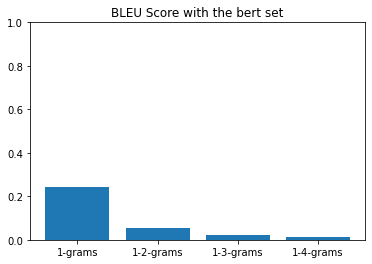

In [113]:
show_bleu_bar("bert")

In [80]:
GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = ''.join(GPT2_model(body, min_length=60))
print(full)

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

The sentences in the DSO collection were tagged with parts of speech using TnT (Brants, 2000) trained on the Brown Corpus itself. For example, Petrov et al (2012) build supervised POS taggers for 22 languages using the TNT tagger (Brants, 2000), with an average accuracy of 95.2%. POS Majority lexical type noun count-noun-le c-n-f verb trans-nerg-str-verb-le haben-auxf adj adj-non-prd-le adv intersect-adv-le Table 5: POS tags to lexical types mapping Again for comparison, we have built another simple baseline model using the TnT POS tagger (Brants, 2000). Finally, we plan to investigate how linguistic annotations can be automatically integrated in the TEI annotated version of the corpus to produce TEI con formant output. Trigrams'n'Tags (TnT) is an efficient statistical part-of-speech tagger. A recent comparison has even shown that TnT performs significantly better for the tested corpora.


In [115]:
gpt_cand=full.split(' ')

In [116]:
bleu(gpt_cand)

In [118]:
bleu_dic

{'1-grams': 0.31111111111111106,
 '1-2-grams': 0.13432835820895522,
 '1-3-grams': 0.11278195488721805,
 '1-4-grams': 0.09848484848484847}

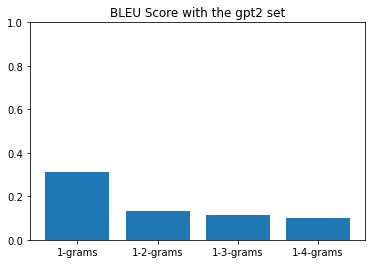

In [119]:
show_bleu_bar("gpt2")

In [120]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [122]:
rouge_ref=summ_df["summaries"][0]

In [121]:
def rouge_scores_func(summariz):
     scores = scorer.score(summariz,
                      rouge_ref)
     print(scores)

In [124]:
rouge_scores_func(bert_summary)

{'rouge1': Score(precision=0.4214876033057851, recall=0.3090909090909091, fmeasure=0.3566433566433566), 'rougeL': Score(precision=0.19834710743801653, recall=0.14545454545454545, fmeasure=0.16783216783216784)}


In [125]:
rouge_scores_func(full)

{'rouge1': Score(precision=0.45454545454545453, recall=0.35714285714285715, fmeasure=0.4), 'rougeL': Score(precision=0.256198347107438, recall=0.2012987012987013, fmeasure=0.22545454545454546)}
